<a href="https://colab.research.google.com/github/dorrah-bakeer/Intro-to-Java-Programming/blob/master/LungCancerProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import the needed libraries

In [504]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score, recall_score,ConfusionMatrixDisplay

#install pandas numpy scikit-learn matplotlib seaborn

Data Collection

In [505]:
# Load the first dataset
data1 = pd.read_csv('lung_cancer.csv')
data1 = data1.rename(columns={'Level': 'Result'})
data1['Result'] = data1['Result'].map({'Low': 0, 'Medium': 0, 'High': 1})

# Load the second dataset (train and test)
data2 = pd.read_csv('survey lung cancer.csv')
data2 = data2.rename(columns={'LUNG_CANCER': 'Result'})
data2['Result'] = data1['Result'].map({'NO': 0, 'YES': 1})

In [506]:
#preprocessing for data1
data1 = data1.drop_duplicates()
data1.drop(columns = ['index', 'Patient Id'], axis = 1, inplace=True)
data1.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Result
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,0
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,1
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,1
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,1


In [507]:
#concatenation of the two dataset 
data = pd.concat([data1, data2], ignore_index=True)
data.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,33.0,1.0,2.0,4.0,5.0,4.0,3.0,2.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17.0,1.0,3.0,1.0,5.0,3.0,4.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35.0,1.0,4.0,5.0,6.0,5.0,5.0,4.0,6.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37.0,1.0,7.0,7.0,7.0,7.0,6.0,7.0,7.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,46.0,1.0,6.0,8.0,7.0,7.0,7.0,6.0,7.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


now we concat the two dataset, data1 and data2, but it still not integrated togrther

In [508]:
# Check the names od the columns for each dataset
print("Columns in first dataset:")
print(data1.columns)

print("\nColumns in second dataset:")
print(data2.columns)


Columns in first dataset:
Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Result'],
      dtype='object')

Columns in second dataset:
Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'Result'],
      dtype='object')


In [509]:
# Rename columns in the first dataset to match columns in the second dataset 
data1 = data1.rename(columns={'Gender': 'GENDER', 'Smoking': 'SMOKING', 'Chest Pain': 'CHEST PAIN', 'Age': 'AGE', 'Result': 'Result',
                              'Alcohol use':'ALCOHOL CONSUMING', 'chronic Lung Disease': 'CHRONIC DISEASE', 'Fatigue': 'FATIGUE ',
                              'Wheezing':'WHEEZING', 'Shortness of Breath':'SHORTNESS OF BREATH'})


In [510]:
data1.head()

,AGE,GENDER,Air Pollution,ALCOHOL CONSUMING,Dust Allergy,OccuPational Hazards,Genetic Risk,CHRONIC DISEASE,Balanced Diet,Obesity,...,FATIGUE,Weight Loss,SHORTNESS OF BREATH,WHEEZING,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Result
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,0
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,1
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,1
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,1


In [511]:
# Select the common columns from both datasets
common_columns = ['GENDER', 'SMOKING', 'CHEST PAIN', 'AGE', 'ALCOHOL CONSUMING', 'CHRONIC DISEASE', 'FATIGUE ', 'WHEEZING', 'SHORTNESS OF BREATH', 'Result']
data1_common = data1[common_columns]
data2_common = data2[common_columns]


In [512]:
# integrate the two datasets with the common columns
data = pd.concat([data1_common, data2_common], ignore_index=True)

# Check the first 5 rows of the integrated dataset
print("\nIntegrated dataset:")
print(data.head())


Integrated dataset:
  GENDER  SMOKING  CHEST PAIN  AGE  ALCOHOL CONSUMING  CHRONIC DISEASE  \
0      1        3           2   33                  4                2   
1      1        2           2   17                  1                2   
2      1        2           4   35                  5                4   
3      1        7           7   37                  7                7   
4      1        8           7   46                  8                6   

   FATIGUE   WHEEZING  SHORTNESS OF BREATH  Result  
0         3         2                    2     0.0  
1         1         8                    7     0.0  
2         8         2                    9     1.0  
3         4         1                    3     1.0  
4         3         1                    4     1.0  


In [513]:
data

,GENDER,SMOKING,CHEST PAIN,AGE,ALCOHOL CONSUMING,CHRONIC DISEASE,FATIGUE,WHEEZING,SHORTNESS OF BREATH,Result
0,1,3,2,33,4,2,3,2,2,0.0
1,1,2,2,17,1,2,1,8,7,0.0
2,1,2,4,35,5,4,8,2,9,1.0
3,1,7,7,37,7,7,4,1,3,1.0
4,1,8,7,46,8,6,3,1,4,1.0
...,...,...,...,...,...,...,...,...,...,...
1304,F,1,1,56,2,2,2,1,2,NaN
1305,M,2,2,70,2,1,2,2,2,NaN
1306,M,2,2,58,2,1,1,2,1,NaN
1307,M,2,2,67,2,1,2,1,2,NaN


Preprocessing

In [514]:
#preprocessing step
# Encode categorical features
data['GENDER'] = data['GENDER'].replace({'M': 1, 'F': 2})
label_encoder = LabelEncoder()
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])
#data['Result'] = data['Result'].replace()

In [515]:
# using the unique() function to get unique elements from the column of the data
print(data['GENDER'].unique())
print(data['SMOKING'].unique())
print(data['CHEST PAIN'].unique())
print(data['ALCOHOL CONSUMING'].unique())
print(data['CHRONIC DISEASE'].unique())
print(data['FATIGUE '].unique())
print(data['WHEEZING'].unique())
print(data['SHORTNESS OF BREATH'].unique())

[0 1]
[3 2 7 8 1 6 5 4]
[2 4 7 3 6 5 9 8 1]
[4 1 5 7 8 3 6 2]
[2 4 7 6 3 5 1]
[3 1 8 4 5 9 2 6]
[2 8 1 4 6 7 5 3]
[2 7 9 3 4 5 6 1]


In [516]:
# using value_counts() function to get the counts of each elements
data['GENDER'].value_counts()
data['SMOKING'].value_counts()
data['CHEST PAIN'].value_counts()
data['ALCOHOL CONSUMING'].value_counts()
data['CHRONIC DISEASE'].value_counts()
data['FATIGUE '].value_counts()
data['WHEEZING'].value_counts()
data['SHORTNESS OF BREATH'].value_counts()

2    441
6    201
1    191
3    140
4     90
7     89
5     87
9     70
Name: SHORTNESS OF BREATH, dtype: int64

In [517]:
# One-Hot Encoding of Categorical Column
one_hot_encoded_data = pd.get_dummies(data, columns = ['GENDER', 'SMOKING', 'CHEST PAIN','ALCOHOL CONSUMING', 
                                                       'CHRONIC DISEASE', 'FATIGUE ', 'WHEEZING', 'SHORTNESS OF BREATH'])
print(one_hot_encoded_data)

      AGE  Result  GENDER_0  GENDER_1  SMOKING_1  SMOKING_2  SMOKING_3  \
0      33     0.0         1         0          0          0          1   
1      17     0.0         1         0          0          1          0   
2      35     1.0         1         0          0          1          0   
3      37     1.0         1         0          0          0          0   
4      46     1.0         1         0          0          0          0   
...   ...     ...       ...       ...        ...        ...        ...   
1304   56     NaN         0         1          1          0          0   
1305   70     NaN         1         0          0          1          0   
1306   58     NaN         1         0          0          1          0   
1307   67     NaN         1         0          0          1          0   
1308   62     NaN         1         0          1          0          0   

      SMOKING_4  SMOKING_5  SMOKING_6  ...  WHEEZING_7  WHEEZING_8  \
0             0          0          0  ..

In [518]:
# Check for missing values and fill it with mean values
data = data.fillna(data.mean())

In [519]:
# Feature scaling
# AGE are continuous features that need scaling.
scaler = StandardScaler()
data[['AGE']] = scaler.fit_transform(data[['AGE']])

In [520]:
data

,GENDER,SMOKING,CHEST PAIN,AGE,ALCOHOL CONSUMING,CHRONIC DISEASE,FATIGUE,WHEEZING,SHORTNESS OF BREATH,Result
0,0,3,2,-0.653746,4,2,3,2,2,0.000
1,0,2,2,-1.679906,1,2,1,8,7,0.000
2,0,2,4,-0.525476,5,4,8,2,9,1.000
3,0,7,7,-0.397206,7,7,4,1,3,1.000
4,0,8,7,0.180009,8,6,3,1,4,1.000
...,...,...,...,...,...,...,...,...,...,...
1304,1,1,1,0.821359,2,2,2,1,2,0.365
1305,0,2,2,1.719249,2,1,2,2,2,0.365
1306,0,2,2,0.949629,2,1,1,2,1,0.365
1307,0,2,2,1.526844,2,1,2,1,2,0.365


In [521]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [522]:
# Split the dataset into features and target variable
X = data.drop('Result', axis=1)
y = data['Result']

In [523]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=0)
print(X_train)

      GENDER  SMOKING  CHEST PAIN       AGE  ALCOHOL CONSUMING  \
750        1        2           3 -0.782016                  2   
859        1        1           4  0.308279                  8   
952        1        1           4 -0.333071                  8   
1300       1        2           2  1.270304                  1   
628        0        2           3 -0.653746                  2   
...      ...      ...         ...       ...                ...   
763        0        7           7 -0.974421                  7   
835        0        7           2  0.051739                  3   
1216       1        2           1  1.526844                  1   
559        0        7           7 -0.397206                  7   
684        0        7           7 -0.461341                  7   

      CHRONIC DISEASE  FATIGUE   WHEEZING  SHORTNESS OF BREATH  
750                 2         4         5                    6  
859                 6         2         5                    6  
952         

In [524]:
# Scale the features using StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Data Profiling

In [525]:
print("Shape:", data.shape)
print("\nHead:\n", data.head())
print("\nTail:\n", data.tail())
print("\nColumns:", data.columns)
print("\nSummary Statistics:\n", data.describe())
print("\nMissing Values:\n", data.isnull().sum())
print("\nData Types:\n", data.dtypes)

for column in data.select_dtypes(include='object'):
    print(f"Unique values in {column}:\n", data[column].unique())


Shape: (1309, 10)

Head:
    GENDER  SMOKING  CHEST PAIN       AGE  ALCOHOL CONSUMING  CHRONIC DISEASE  \
0       0        3           2 -0.653746                  4                2   
1       0        2           2 -1.679906                  1                2   
2       0        2           4 -0.525476                  5                4   
3       0        7           7 -0.397206                  7                7   
4       0        8           7  0.180009                  8                6   

   FATIGUE   WHEEZING  SHORTNESS OF BREATH  Result  
0         3         2                    2     0.0  
1         1         8                    7     0.0  
2         8         2                    9     1.0  
3         4         1                    3     1.0  
4         3         1                    4     1.0  

Tail:
       GENDER  SMOKING  CHEST PAIN       AGE  ALCOHOL CONSUMING  \
1304       1        1           1  0.821359                  2   
1305       0        2           2  

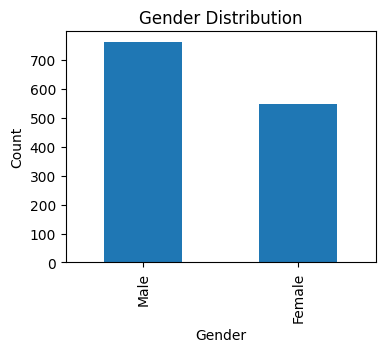

In [526]:
data['GENDER'] = data['GENDER'].map({0: 'Male', 1: 'Female'})
data['GENDER'].value_counts().plot(kind='bar', figsize=(4, 3))
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

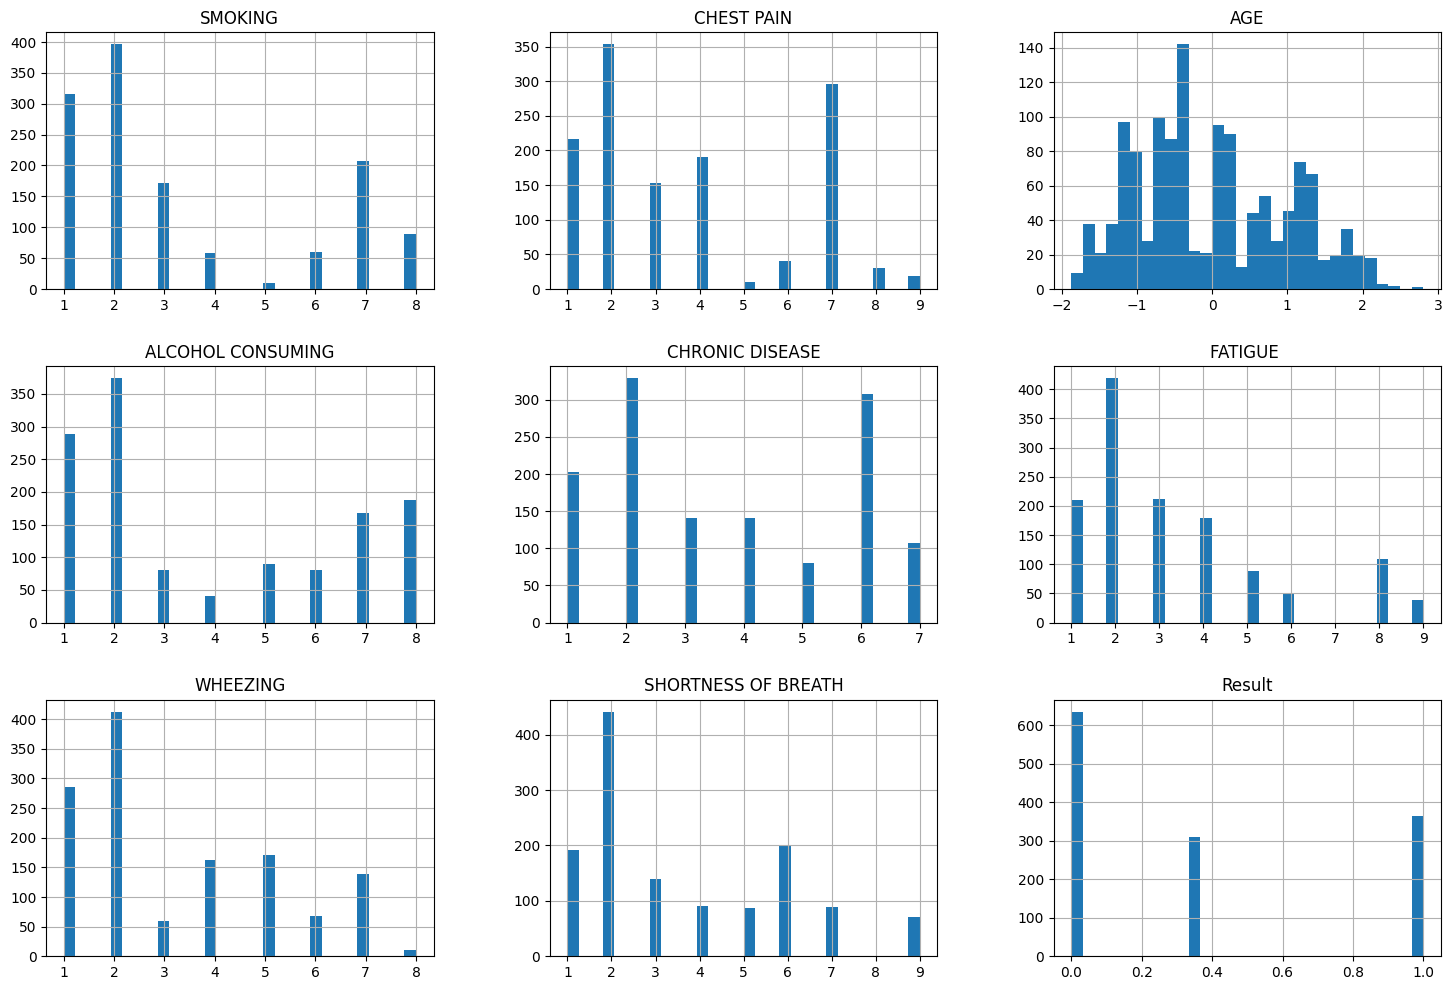

In [527]:
data.hist(bins=30, figsize=(18,12))
plt.show()

<ipython-input-528-9ca8ac761095>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), square = True, cmap = 'BrBG' , annot=True)


<Figure size 3000x2400 with 0 Axes>

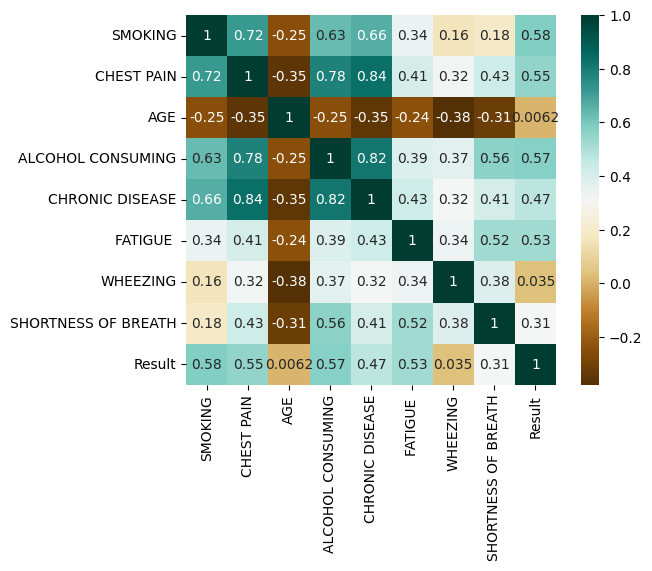

<Figure size 3000x2400 with 0 Axes>

In [528]:
sns.heatmap(data.corr(), square = True, cmap = 'BrBG' , annot=True)
plt.figure(figsize=(30,24))

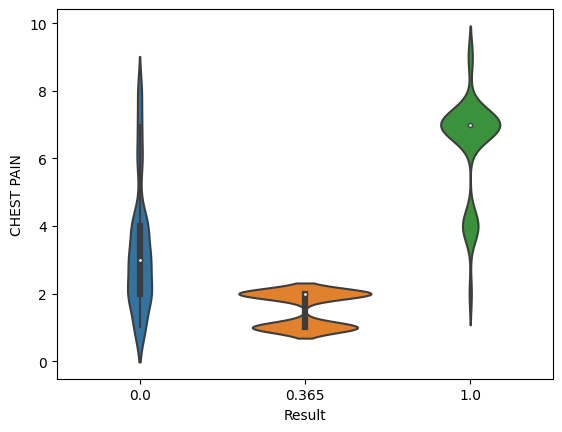

In [529]:
sns.violinplot(x = 'Result', y = 'CHEST PAIN', data = data, size = 8)
plt.show()

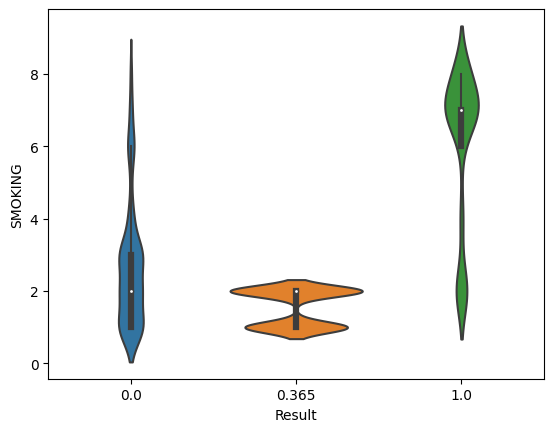

In [530]:
sns.violinplot(x = 'Result', y = 'SMOKING', data = data, size = 8)
plt.show()